In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

from keras.models import Sequential
from keras.layers import InputLayer, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError
from keras.constraints import MaxNorm
from keras.callbacks import ModelCheckpoint

import time

In [2]:
filepath = 'C:/Users/ss230/Documents/Study/NSIDC/Edited Data/N_Sea_Ice_Index_Regional_Monthly_Data_G02135_v3.0.xlsx'
Baffin = pd.read_excel(filepath, sheet_name='Baffin-Extent-km^2')

In [3]:
import sys
sys.path.append('C:/Users/ss230/Documents/Study/NSIDC/NH/')
import Function as fp

In [4]:
fp.month_mapping(Baffin)
fp.date_time(Baffin)

,Extent,Date
0,1090625.815,1979-01-01
1,1157634.866,1979-02-01
2,1299583.477,1979-03-01
3,1137194.680,1979-04-01
4,983083.453,1979-05-01
...,...,...
533,781460.891,2023-06-01
534,331845.048,2023-07-01
535,99334.625,2023-08-01
536,49359.723,2023-09-01


In [5]:
scaler = MinMaxScaler()
Baffin['Extent'] = scaler.fit_transform(Baffin['Extent'].values.reshape(-1, 1))

In [6]:
def df_to_X_y(df, window_size):
    df_as_np = df.to_numpy()
    X = []
    y = []
    lead_time = 7
    for i in range(len(df_as_np) - window_size - lead_time + 1):
        window_data = df_as_np[i:i+window_size]
        row = [[a] for a in window_data]
        X.append(row)
        label = df_as_np[i+window_size+lead_time-1]  # Adjusted for lead time
        y.append(label)
    return np.array(X), np.array(y)

In [7]:
extent = Baffin['Extent']
W_S=12
X,y = df_to_X_y(extent, W_S)
X.shape, y.shape

((520, 12, 1), (520,))

In [8]:
X_train, y_train = X[:419], y[:419]
X_val, y_val = X[419:471], y[419:471]
X_test, y_test = X[471:], y[471:]

In [9]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(W_S, 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(32, kernel_constraint=MaxNorm(1.0), activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='linear'))

In [10]:
cp = ModelCheckpoint('Baffin_model_LT7/', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(0.0001), metrics=[RootMeanSquaredError()])

In [11]:
stime = time.time()
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=50, batch_size=8, callbacks=[cp])
etime = time.time()

Epoch 1/50
46/53 [=========================>....] - ETA: 0s - loss: 0.2809 - root_mean_squared_error: 0.5300

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 9s 106ms/step - loss: 0.2762 - root_mean_squared_error: 0.5256 - val_loss: 0.1784 - val_root_mean_squared_error: 0.4223
Epoch 2/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1628 - root_mean_squared_error: 0.4035

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.1607 - root_mean_squared_error: 0.4009 - val_loss: 0.1403 - val_root_mean_squared_error: 0.3745
Epoch 3/50
51/53 [===========================>..] - ETA: 0s - loss: 0.1228 - root_mean_squared_error: 0.3504

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 3s 62ms/step - loss: 0.1218 - root_mean_squared_error: 0.3490 - val_loss: 0.1192 - val_root_mean_squared_error: 0.3452
Epoch 4/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0971 - root_mean_squared_error: 0.3117

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 4s 75ms/step - loss: 0.0945 - root_mean_squared_error: 0.3075 - val_loss: 0.1022 - val_root_mean_squared_error: 0.3197
Epoch 5/50
43/53 [=======================>......] - ETA: 0s - loss: 0.0759 - root_mean_squared_error: 0.2756

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 4s 67ms/step - loss: 0.0733 - root_mean_squared_error: 0.2708 - val_loss: 0.0854 - val_root_mean_squared_error: 0.2923
Epoch 6/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0545 - root_mean_squared_error: 0.2334

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 87ms/step - loss: 0.0539 - root_mean_squared_error: 0.2321 - val_loss: 0.0739 - val_root_mean_squared_error: 0.2718
Epoch 7/50
52/53 [============================>.] - ETA: 0s - loss: 0.0433 - root_mean_squared_error: 0.2082

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 97ms/step - loss: 0.0431 - root_mean_squared_error: 0.2075 - val_loss: 0.0605 - val_root_mean_squared_error: 0.2459
Epoch 8/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0303 - root_mean_squared_error: 0.1740

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0324 - root_mean_squared_error: 0.1800 - val_loss: 0.0509 - val_root_mean_squared_error: 0.2256
Epoch 9/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0225 - root_mean_squared_error: 0.1501

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0222 - root_mean_squared_error: 0.1491 - val_loss: 0.0374 - val_root_mean_squared_error: 0.1934
Epoch 10/50
48/53 [==========================>...] - ETA: 0s - loss: 0.0220 - root_mean_squared_error: 0.1482

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0218 - root_mean_squared_error: 0.1477 - val_loss: 0.0284 - val_root_mean_squared_error: 0.1686
Epoch 11/50
50/53 [===========================>..] - ETA: 0s - loss: 0.0193 - root_mean_squared_error: 0.1391

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 99ms/step - loss: 0.0196 - root_mean_squared_error: 0.1399 - val_loss: 0.0186 - val_root_mean_squared_error: 0.1362
Epoch 12/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0191 - root_mean_squared_error: 0.1382

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 104ms/step - loss: 0.0188 - root_mean_squared_error: 0.1371 - val_loss: 0.0126 - val_root_mean_squared_error: 0.1124
Epoch 13/50
52/53 [============================>.] - ETA: 0s - loss: 0.0139 - root_mean_squared_error: 0.1180

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 96ms/step - loss: 0.0146 - root_mean_squared_error: 0.1207 - val_loss: 0.0076 - val_root_mean_squared_error: 0.0871
Epoch 14/50
46/53 [=========================>....] - ETA: 0s - loss: 0.0188 - root_mean_squared_error: 0.1369

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 98ms/step - loss: 0.0192 - root_mean_squared_error: 0.1385 - val_loss: 0.0055 - val_root_mean_squared_error: 0.0742
Epoch 15/50
53/53 [==============================] - 0s 7ms/step - loss: 0.0170 - root_mean_squared_error: 0.1302 - val_loss: 0.0063 - val_root_mean_squared_error: 0.0794
Epoch 16/50
45/53 [========================>.....] - ETA: 0s - loss: 0.0180 - root_mean_squared_error: 0.1342

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 101ms/step - loss: 0.0173 - root_mean_squared_error: 0.1315 - val_loss: 0.0037 - val_root_mean_squared_error: 0.0607
Epoch 17/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0123 - root_mean_squared_error: 0.1107 - val_loss: 0.0042 - val_root_mean_squared_error: 0.0650
Epoch 18/50
49/53 [==========================>...] - ETA: 0s - loss: 0.0141 - root_mean_squared_error: 0.1186

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 92ms/step - loss: 0.0141 - root_mean_squared_error: 0.1188 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0514
Epoch 19/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0126 - root_mean_squared_error: 0.1122 - val_loss: 0.0029 - val_root_mean_squared_error: 0.0539
Epoch 20/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0127 - root_mean_squared_error: 0.1128 - val_loss: 0.0034 - val_root_mean_squared_error: 0.0586
Epoch 21/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0117 - root_mean_squared_error: 0.1080 - val_loss: 0.0031 - val_root_mean_squared_error: 0.0554
Epoch 22/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0142 - root_mean_squared_error: 0.1193 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0518
Epoch 23/50
47/53 [=========================>....] - ETA: 0s - loss: 0.0177 - root_mean_squared_error: 0.1330

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 89ms/step - loss: 0.0168 - root_mean_squared_error: 0.1294 - val_loss: 0.0023 - val_root_mean_squared_error: 0.0481
Epoch 24/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0491
Epoch 25/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0129 - root_mean_squared_error: 0.1138 - val_loss: 0.0026 - val_root_mean_squared_error: 0.0512
Epoch 26/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0156 - root_mean_squared_error: 0.1250 - val_loss: 0.0024 - val_root_mean_squared_error: 0.0486
Epoch 27/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0132 - root_mean_squared_error: 0.1151 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0495
Epoch 28/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0172 - root_mean_squared_error: 0.1311 - val_loss: 0.0024 - val_root_mean_squared

INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


INFO:tensorflow:Assets written to: Baffin_model_LT7\assets


53/53 [==============================] - 5s 94ms/step - loss: 0.0145 - root_mean_squared_error: 0.1205 - val_loss: 0.0022 - val_root_mean_squared_error: 0.0474
Epoch 34/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0147 - root_mean_squared_error: 0.1211 - val_loss: 0.0025 - val_root_mean_squared_error: 0.0501
Epoch 35/50
53/53 [==============================] - 0s 8ms/step - loss: 0.0134 - root_mean_squared_error: 0.1159 - val_loss: 0.0036 - val_root_mean_squared_error: 0.0598
Epoch 36/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0124 - root_mean_squared_error: 0.1112 - val_loss: 0.0035 - val_root_mean_squared_error: 0.0590
Epoch 37/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0138 - root_mean_squared_error: 0.1174 - val_loss: 0.0027 - val_root_mean_squared_error: 0.0515
Epoch 38/50
53/53 [==============================] - 0s 9ms/step - loss: 0.0162 - root_mean_squared_error: 0.1273 - val_loss: 0.0050 - val_root_mean_squared

In [12]:
time = (etime - stime)/60
print(f'{time} minutes')

1.6973713517189026 minutes


In [13]:
loss = history.history['loss']
epochs = list(range(1, len(loss) + 1))

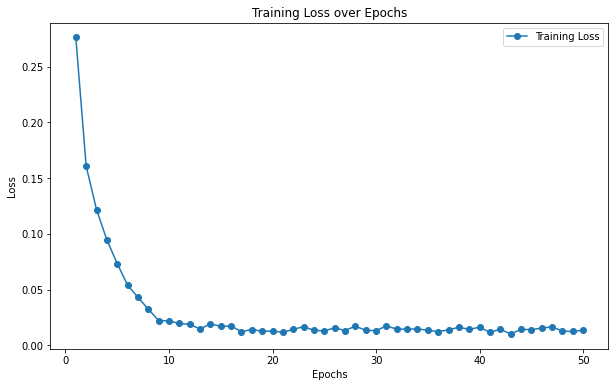

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(epochs, loss, label='Training Loss', marker='o', linestyle='-')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

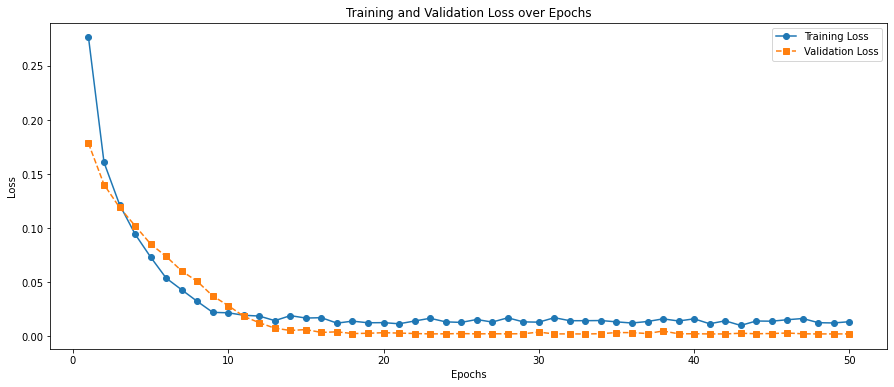

In [15]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)

plt.figure(figsize=(15,6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='s', linestyle='--')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.show()

Test Predictions

In [16]:
from tensorflow.keras.models import load_model
model1 = load_model('Baffin_model_LT7/')

In [17]:
test_predictions = model1.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [18]:
mse = mean_squared_error(y_test, test_predictions)
print('RMSE :', np.sqrt(mse))

RMSE : 0.06476805729824767


In [19]:
mae = mean_absolute_error(y_test, test_predictions)
print(mae)

0.052427500346193964


In [20]:
test_predictions = scaler.inverse_transform(test_predictions)
test_original = scaler.inverse_transform(y_test.reshape(-1,1))

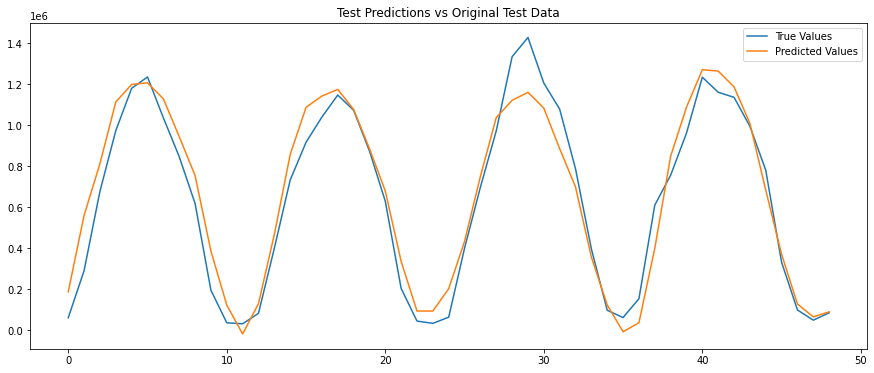

In [21]:
plt.figure(figsize=(15,6))
plt.plot(test_original, label='True Values')
plt.plot(test_predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()

Prediction on whole dataset

In [22]:
predictions = model1.predict(X)

17/17 [==============================] - 0s 3ms/step


In [23]:
mse = mean_squared_error(y, predictions)
print(mse)

0.004406719801584788


In [24]:
mae = mean_absolute_error(y, predictions)
print(mae)

0.05067947474792957


In [25]:
predictions = scaler.inverse_transform(predictions)
Original = scaler.inverse_transform(y.reshape(-1,1))

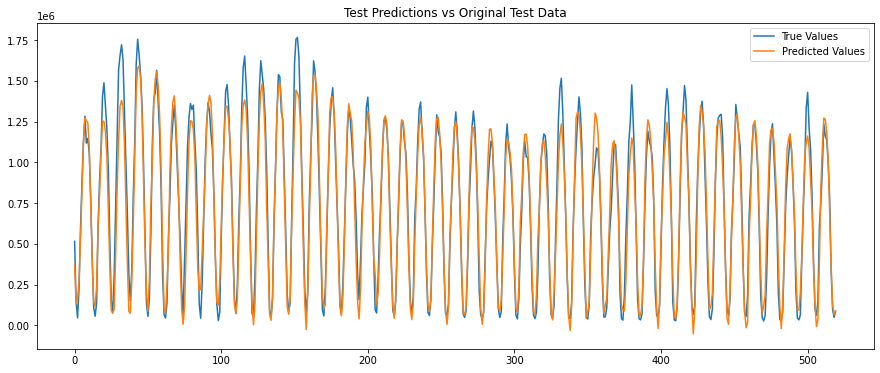

In [26]:
plt.figure(figsize=(15,6))
plt.plot(Original, label='True Values')
plt.plot(predictions, label='Predicted Values')
plt.title('Test Predictions vs Original Test Data')
plt.legend()
plt.show()